<a href="https://colab.research.google.com/github/Nikitaamo/picshredding/blob/main/PT2_Nikita_Amosenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

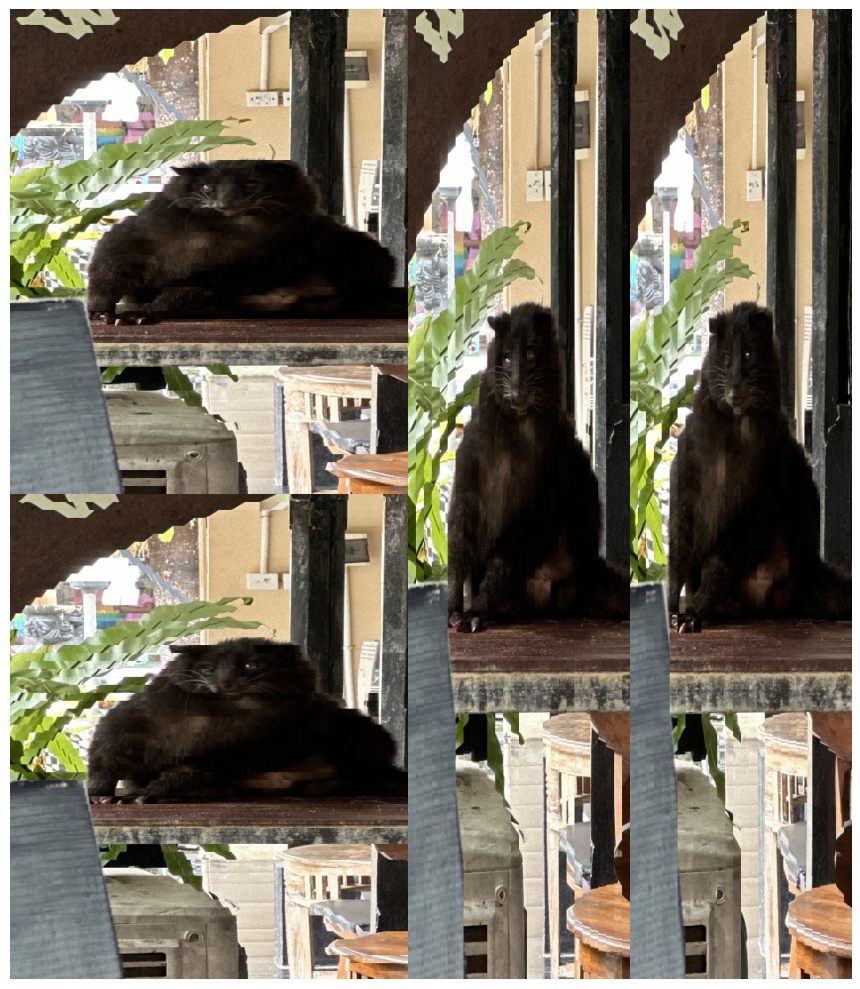

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import urllib.request

# Function to split the image into horizontal strips and stack them alternately
def split_and_stack_image(image, strip_height):
    num_strips = image.shape[0] // strip_height
    even_strips = []
    odd_strips = []
    for i in range(num_strips):
        strip = image[i * strip_height:(i + 1) * strip_height, :]
        if i % 2 == 0:
            even_strips.append(strip)
        else:
            odd_strips.append(strip)
    if image.shape[0] % strip_height != 0:
        last_strip = image[num_strips * strip_height:, :]
        even_strips.append(last_strip)
    even_image = np.vstack(even_strips)
    odd_image = np.vstack(odd_strips)
    min_height = min(even_image.shape[0], odd_image.shape[0])
    even_image = even_image[:min_height]
    odd_image = odd_image[:min_height]
    stacked_image = np.vstack((even_image, odd_image))
    return stacked_image

# Function to vertically split the image and stack strips side by side
def split_and_stack_image_vertically(image, strip_width):
    num_strips = image.shape[1] // strip_width
    even_strips = []
    odd_strips = []
    for i in range(num_strips):
        strip = image[:, i * strip_width:(i + 1) * strip_width]
        if i % 2 == 0:
            even_strips.append(strip)
        else:
            odd_strips.append(strip)
    if image.shape[1] % strip_width != 0:
        last_strip = image[:, num_strips * strip_width:]
        even_strips.append(last_strip)
    even_image = np.hstack(even_strips)
    odd_image = np.hstack(odd_strips)
    min_width = min(even_image.shape[1], odd_image.shape[1])
    even_image = even_image[:, :min_width]
    odd_image = odd_image[:, :min_width]
    stacked_image = np.hstack((even_image, odd_image))
    return stacked_image

# Download the image
url = 'https://raw.githubusercontent.com/Nikitaamo/picshredding/main/IMG1.jpg'
urllib.request.urlretrieve(url, 'IMG1.jpg')

# Load the image
img = mpimg.imread('IMG1.jpg')

# Define strip height and width for shredding effect
strip_height = 10  # For horizontal shredding
strip_width = 10   # For vertical shredding

# Apply functions to the image
stacked_img_horizontal = split_and_stack_image(img, strip_height)
stacked_img_vertical = split_and_stack_image_vertically(img, strip_width)

# Display images without spaces between them and without axes
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(stacked_img_horizontal)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(stacked_img_vertical)
plt.axis('off')

# Adjust layout to remove spaces between images
plt.subplots_adjust(wspace=-1, hspace=0)
plt.tight_layout()

plt.show()
